In [1]:
#required imports
import numpy as np, matplotlib.pyplot as plt
import sep, astropy.io.fits as fits
from matplotlib import rcParams
from matplotlib.patches import Ellipse

%matplotlib inline

In [2]:
#import fits formatted data to array
f105data = fits.getdata("./data/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")
f105data = f105data.byteswap().newbyteorder()

#data analysis
f105mean, f105std = np.mean(f105data), np.std(f105data)

#background removal processing
#I'll come back to find out more about the parameters in use here
f105bkg = sep.Background(f105data, bw=64, bh=64, fw=3, fh=3)
f105bkg_image = f105bkg.back()
f105bkg_rms = f105bkg.rms()
f105data_sub = f105data - f105bkg

In [3]:
#get the objects
f105objects = sep.extract(f105data_sub, 1.5, err=f105bkg.globalrms)

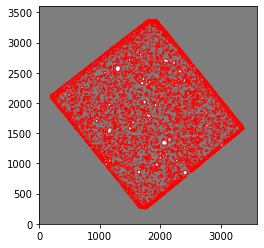

In [4]:
#plot the f105 data
#plot background-subtracted image
f, ax = plt.subplots()
f105sub_mean, f105sub_std = np.mean(f105data_sub), np.std(f105data_sub)
im = ax.imshow(f105data_sub, interpolation = 'nearest', cmap = 'gray',
               vmin = f105sub_mean - f105sub_std, vmax = f105sub_mean + f105sub_std, origin='lower')

#save a clean copy
f.set_facecolor("white")
f.savefig("./output/f105 clean.png", bbox_inches = "tight", dpi = 300)

#plot an ellipse for each object
for i in range(len(f105objects)):
    f105e = Ellipse(xy = (f105objects['x'][i], f105objects['y'][i]),
                width = 6 * f105objects['a'][i],
                height = 6 * f105objects['b'][i],
                angle = f105objects['theta'][i] * 180. / np.pi)
    f105e.set_facecolor('none')
    f105e.set_edgecolor('red')
    ax.add_artist(f105e)
    
f.savefig("./output/f105 identification.png", bbox_inches = "tight", dpi = 300)

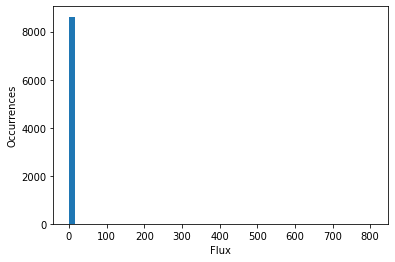

In [8]:
#calculate the fluxes
f105flux, f105fluxerr, f105flag = sep.sum_circle(f105data_sub, f105objects['x'], f105objects['y'],
                                     3.0, err = f105bkg.globalrms, gain = 1.0)

#plot on a histogram
f, ax = plt.subplots()
ax.hist(f105flux, 50)
ax.set_xlabel("Flux")
ax.set_ylabel("Occurrences")

#save histogram of raw data
f.set_facecolor("white")
f.savefig("./output/f105 raw flux histogram.png", bbox_inches = "tight", dpi = 300)

In [9]:
#init a temp array to hold edges
hold  = []
#find literal edge cases
for i in range(len(f105flux)):
    if f105flux[i] < 3:
        hold.append(f105flux[i])

#remove edge cases
edges = np.array(hold)
f105fluxclean = np.setdiff1d(f105flux, edges)

#print the number of remaining sources
print(f"The cleaned number of sources is: {len(f105fluxclean)}")

The cleaned number of sources is: 99


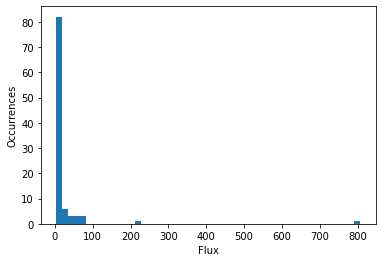

In [10]:
#replot with edge cases removed
f, ax = plt.subplots()
ax.hist(f105fluxclean, 50)
ax.set_xlabel("Flux")
ax.set_ylabel("Occurrences")

#save histogram of cleaned data
f.set_facecolor("white")
f.savefig("./output/f105 clean flux histogram.png", bbox_inches = "tight", dpi = 300)

In [ ]:
#import fits formatted data to array
f125Data = fits.getdata("./data/hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits")
f160Data = fits.getdata("./data/hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits")